In [2]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.framework import ops

In [3]:

df = pd.read_csv("UVXY_trans-2019.csv", index_col = 0)
#df = df.reindex(index=df.index[::-1])  No need to reverse
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2018-10-18 to 2019-10-17
Data columns (total 5 columns):
Open      251 non-null float64
Close     251 non-null float64
Low       251 non-null float64
High      251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


Open      Close        Low       High    Volume
Date                                                            
2018-10-18  49.580002  53.490002  49.480000  56.099998  17703400
2018-10-19  52.650002  52.759998  50.750000  55.500000  14758100
2018-10-22  52.130001  53.380001  51.970001  56.730000  11430600
2018-10-23  60.080002  56.320000  54.880001  62.680000  15337000
2018-10-24  55.840000  63.980000  55.380001  64.779999  18226600

In [4]:
df.tail()

Open      Close        Low   High    Volume
Date                                                        
2019-10-11  25.680000  24.610001  24.000000  25.93  30119100
2019-10-14  24.770000  23.440001  23.400000  24.77  11273900
2019-10-15  22.690001  22.480000  21.990000  22.73  19021900
2019-10-16  22.400000  22.059999  22.000000  22.77  12973400
2019-10-17  21.600000  21.860001  21.370001  22.08  13116600

In [5]:
df.describe()

Open       Close         Low        High        Volume
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean    42.453785   42.340478   41.089641   44.142709  1.114158e+07
std     15.194119   15.106324   14.499690   16.081692  6.364138e+06
min     21.600000   21.860001   21.370001   22.080000  2.418400e+06
25%     31.200000   31.210000   30.625000   32.375000  6.975600e+06
50%     37.799999   37.790001   36.610001   38.889999  9.263200e+06
75%     52.685001   53.145000   51.600001   56.164999  1.329110e+07
max     88.779999   88.080002   85.550003   94.949997  4.213990e+07

In [6]:
df.iloc[:,:5]

Open      Close        Low       High    Volume
Date                                                            
2018-10-18  49.580002  53.490002  49.480000  56.099998  17703400
2018-10-19  52.650002  52.759998  50.750000  55.500000  14758100
2018-10-22  52.130001  53.380001  51.970001  56.730000  11430600
2018-10-23  60.080002  56.320000  54.880001  62.680000  15337000
2018-10-24  55.840000  63.980000  55.380001  64.779999  18226600
...               ...        ...        ...        ...       ...
2019-10-11  25.680000  24.610001  24.000000  25.930000  30119100
2019-10-14  24.770000  23.440001  23.400000  24.770000  11273900
2019-10-15  22.690001  22.480000  21.990000  22.730000  19021900
2019-10-16  22.400000  22.059999  22.000000  22.770000  12973400
2019-10-17  21.600000  21.860001  21.370001  22.080000  13116600

[251 rows x 5 columns]

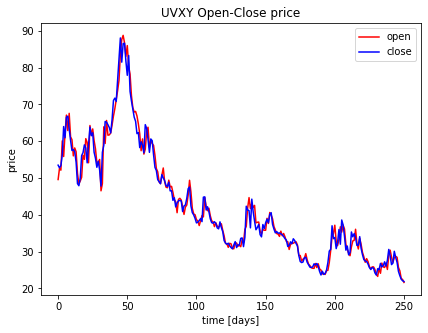

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)


plt.plot(df.iloc[:,:1].values, color='red', label='open')
plt.plot(df.iloc[:,1:2].values, color='blue', label='close')



plt.title('UVXY Open-Close price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend()
plt.show()

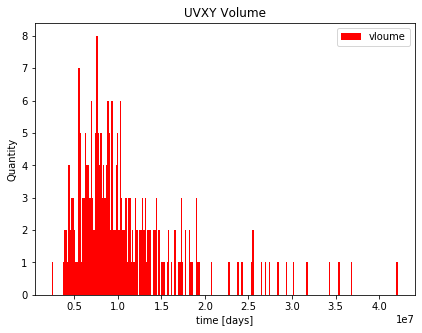

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
tick = [i for i in range(251)]
#print(tick)
plt.hist(df.iloc[:,4:5].values, bins =250,color='red', label='vloume')


#plt.xticks(tick)

plt.title('UVXY Volume')
plt.xlabel('time [days]')
plt.ylabel('Quantity')
plt.legend()
plt.show()

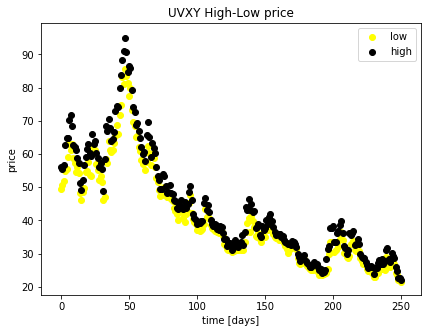

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
tick = [i for i in range(251)]
#print(tick)

plt.scatter(tick,df.iloc[:,2:3].values, color='yellow', label='low')
plt.scatter(tick,df.iloc[:,3:4].values, color='black', label='high')


plt.title('UVXY High-Low price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend()
plt.show()